# Machine Learning From Disaster - Titanic

## Business Understanding

RMS Titanic was a British passenger liner operated by the White Star Line,
that sank in the North Atlantic Ocean in the early morning hours of April 15, 1912.
The Titanic struck an iceberg during her maiden voyage from Southampton to New York City. 
Of the estimated 2,224 passengers and crew aboard, more than 1,500 died, 
making the sinking one of modern history's deadliest peacetime commercial marine disasters. 

RMS Titanic was the largest ship afloat at the time she entered service and was the second 
of three Olympic-class ocean liners operated by the White Star Line. She was built by the Harland
and Wolff shipyard in Belfast. Thomas Andrews, chief naval architect of the shipyard at the time, 
died in the disaster.

Titanic was under the command of Capt. Edward Smith, who also went down with the ship.
The ocean liner carried some of the wealthiest people in the world, 
as well as hundreds of emigrants from Great Britain and Ireland,
Scandinavia and elsewhere throughout Europe, who were seeking a new life in the United States.

The first-class accommodation was designed to be the pinnacle of comfort and luxury, with a gymnasium,
swimming pool, libraries, high-class restaurants and opulent cabins.
A high-powered radiotelegraph transmitter was available for sending passenger "marconigrams" 
and for the ship's operational use.
Although Titanic had advanced safety features, such as watertight compartments and remotely activated 
watertight doors, it only carried enough lifeboats for 1,178 people—about half the number on board, 
and one third of her total capacity—due to outdated maritime safety regulations. 

After leaving Southampton on 10 April 1912, Titanic called at Cherbourg in France and Queenstown 
(now Cobh) in Ireland, before heading west to New York.

On 14 April, four days into the crossing and about 375 miles (600 km) south of Newfoundland, 
she hit an iceberg at 11:40 p.m. ship's time. 
The collision caused the hull plates to buckle inwards along her starboard (right) side and opened 
five of her sixteen watertight compartments to the sea; she could only survive four flooding. 

Meanwhile, passengers and some crew members were evacuated in lifeboats, many of which were launched only
partially loaded.
A disproportionate number of men were left aboard because of a "women and children first" protocol for 
loading lifeboats. At 2:20 a.m., she broke apart and foundered with well over one thousand people still aboard.

### Specifying the Data Analytic Question

Use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

### Defining the Metric for Success

1)We Identify the most importaint features for predicting the chances of survival.

2)The model achieves atleast 70% accuracy.



### Data Understanding

The project was undertaken using the following design Datasets(titanic.csv)

Data Description

Pclass Passenger Class: (1 = 1st class; 2 = 2nd class; 3 = 3rd class)
Survival : (0 = No; 1 = Yes)

sibsp: Number of Siblings/Spouses Aboard
parch:  Number of Parents/Children Aboard
ticket: Ticket Number
fare: Passenger Fare in (British pound)

embarked Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

### Recording the Experimental Design




Data Cleaning

External Data Source Validation

Exploratory Data Analysis

Modelling: KNN(K- Nearest Neighbor), Naive Bayes

Challenging the solution
    
Follow up Questions

Conclusion

### Data Relevance

How accurate is the data at predicting whether a passenger survived or not?

Was the dataset sufficient?

Was the data biased?

Is the data source a reliable source?

## Data Cleaning

### Importing the libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,f1_score,classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics       
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Reading the Data

In [ ]:
# Loading the Data from the source i.e. csv
# ---
# Dataset source = train.csv
# ---
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')



### Checking the Data

In [ ]:
#previewing the train dataset
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#previewing the test dataset
df_test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


The train dataset has the dependent variable we want to predict (survived) while the test dateset lack the survived column.

We will use this the train data to train our model.

The test data helps us evaluate how well our model performs on unseen data.

In [ ]:
# Determining the no. of records in our dataset

df_train.shape



(891, 12)

In [ ]:
#getting more information about our data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Previewing the bottom of our dataset
df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### Tidying the Dataset

In [ ]:
# Checking for null values 
df_train.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#Replacing the missing values with the mean. 

df_train['Age']= df_train['Age'].fillna(df_train['Age'].mean(), axis = 0)

In [ ]:
df_train.PassengerId.nunique()

891

In [ ]:
df_train.Ticket.nunique()

681

The ['PassengerId','Ticket'] columns have so many unique columns (high dimensionality) hence we drop them




In [ ]:

df_train= df_train.drop( ['PassengerId','Ticket'] , axis = 1)


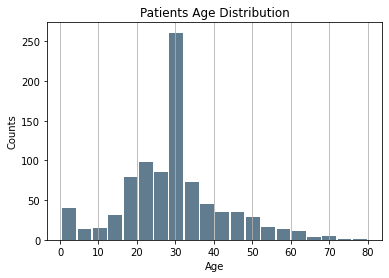

In [ ]:
#visualizing age dirstibution
size, scale = 1000, 10
age = df_train['Age']

age.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Patients Age Distribution')
plt.xlabel('Age')
plt.ylabel('Counts')
plt.grid(axis='y')

In [ ]:
df_train.groupby("Cabin")['Fare'].mean().sort_values()

Cabin
B102                 0.0000
B94                  0.0000
A36                  0.0000
F G63                7.6500
F G73                7.6500
                     ...   
B58 B60            247.5208
B51 B53 B55        258.6646
B57 B59 B63 B66    262.3750
C23 C25 C27        263.0000
B101               512.3292
Name: Fare, Length: 147, dtype: float64

In [ ]:
df_train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [ ]:
#There are too many unigue values but we can group the cabins using the first letter of the cabin


## Assigning the null values to Z
df_train.Cabin.fillna("Z", inplace=True)

#using the first letter as cabin entries
df_train.Cabin = [i[0] for i in df_train.Cabin]
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,Z,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,Z,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,Z,S


In [ ]:

#we then obtain the average fares for every cabin. 

df_train.groupby("Cabin")['Fare'].mean().sort_values(ascending = True)


Cabin
G     13.581250
F     18.696792
Z     19.157325
T     35.500000
A     39.623887
E     46.026694
D     57.244576
C    100.151341
B    113.505764
Name: Fare, dtype: float64

Partition G has the lowest mean value meaning that was the cheapest Cabin partition while
Partition B has the highest mean value meaning that was the most expensive Cabin partition.

In [ ]:
df_train['Cabin'].isnull().sum()

0

In [ ]:
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,Z,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,Z,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,Z,S


In [ ]:
df_train.Cabin.isnull().sum()

0

In [ ]:
df_train.groupby("Cabin")['Fare'].mean().sort_values(ascending = True)

Cabin
G     13.581250
F     18.696792
Z     19.157325
T     35.500000
A     39.623887
E     46.026694
D     57.244576
C    100.151341
B    113.505764
Name: Fare, dtype: float64

In [ ]:
df_train['Cabin']=df_train['Cabin'].replace("Z", np.NaN)

In [ ]:
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


In [ ]:
def filling_cabin(dataset):
    cabin=[]
    for index,df_train in dataset.iterrows():
        if df_train ['Pclass']==1:
            if df_train ['Fare']<40:
                cabin.append('A')
            elif df_train ['Fare'] in range(40,60):
                cabin.append('D')
            elif df_train ['Fare'] in range(60,90):
                cabin.append('C')
            else:
                cabin.append('B')
        elif df_train ['Pclass']==2:
                if df_train ['Fare']<10:
                    cabin.append('E')
                elif df_train ['Fare'] in range(10,20):
                    cabin.append('D')
                else:
                    cabin.append('F')
        elif df_train ['Pclass']==3:
                if df_train ['Fare']<15:
                    cabin.append('F')
                elif df_train ['Fare'] in range(15,25):
                    cabin.append('E')
                else:
                    cabin.append('G')
    return cabin

In [ ]:
non_cabin=df_train[df_train['Cabin'].isnull()]

In [ ]:
df_train.loc[df_train['Cabin'].isnull(),'Cabin']=filling_cabin(non_cabin)

In [ ]:
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,F,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,F,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,F,S


#### Embarked Column

In [ ]:
#The embarked column has two missing values

df_train[df_train.Embarked.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
61,1,1,"Icard, Miss. Amelie",female,38.0,0,0,80.0,B,NaN
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,80.0,B,NaN


similarities between the two rows with null values on the embarked column.
 survived
 P class 1
 Female

Text(0.5, 1.0, 'Test Set')

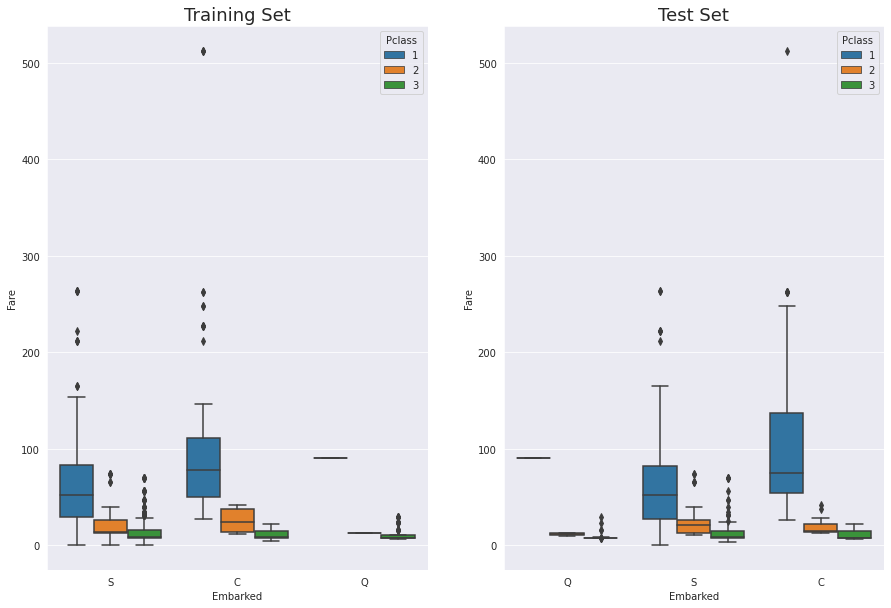

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(15,10),ncols=2)
ax1 = sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=df_train, ax = ax[0]);
ax2 = sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=df_test, ax = ax[1]);
ax1.set_title("Training Set", fontsize = 18)
ax2.set_title('Test Set',  fontsize = 18)

On both the train and test dataset, most of the passengers who paid an average fare of 80$ had 
type 'C' on the embarked column thus we replace the null vales with C.

In [ ]:
## Replacing the null values in the Embarked column with C. 


df_train.Embarked.fillna("C", inplace=True)


In [ ]:
df_train.isnull().sum().sum()

0

## Exploratory Data Analysis

### Univariate Analysis

#### Numerical Columns

##### Age Column

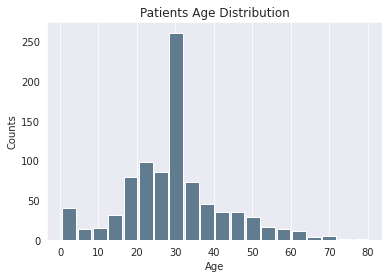

In [ ]:
#visualizing age distribution
size, scale = 1000, 10
age = df_train['Age']

age.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Patients Age Distribution')
plt.xlabel('Age')
plt.ylabel('Counts')
plt.grid(axis='y')

The distribution is leptokurtic.
The Kurtosis is greater than normal which may the effect of replacing the missing values with the mean age

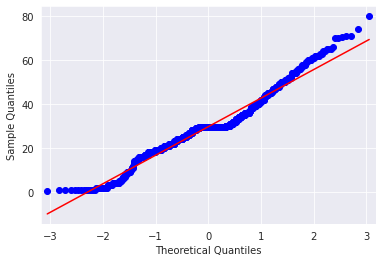

In [ ]:
#Normality test 
# Importing libraries to plot our Q-Q plot
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

# generate univariate observations
data = df_train['Age']

# q-q plot
qqplot(data, line='s')
pyplot.show()

The age follows a normal distribution

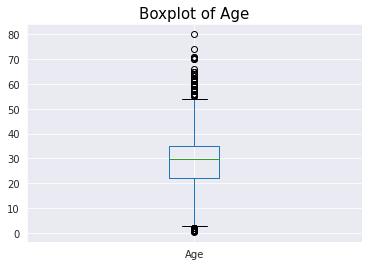

In [ ]:
#checking for outliers using a boxplot
df_train.boxplot(column=['Age'])
plt.title("Boxplot of Age",fontsize=15,color="black")
plt.show()

In [ ]:
df_train.Cabin.value_counts()

F    481
G    132
D     77
B     66
C     59
E     41
A     34
T      1
Name: Cabin, dtype: int64

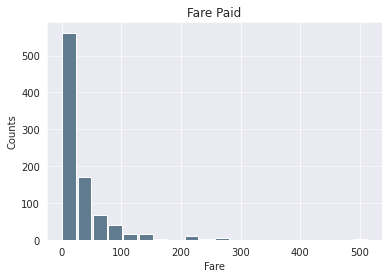

In [ ]:
#visualizing fare distribution
size, scale = 1000, 10
age = df_train['Fare']

age.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Fare Paid')
plt.xlabel('Fare')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

Distribution of the fares paid is right skewed. 

#### Categorical Columns

##### Cabin Column

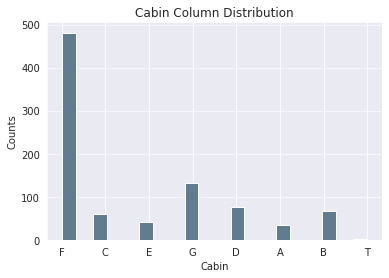

In [ ]:
#visualizing Cabin distribution
size, scale = 1000, 10
age = df_train['Cabin']

age.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Cabin Column Distribution')
plt.xlabel('Cabin')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

##### Other Columns

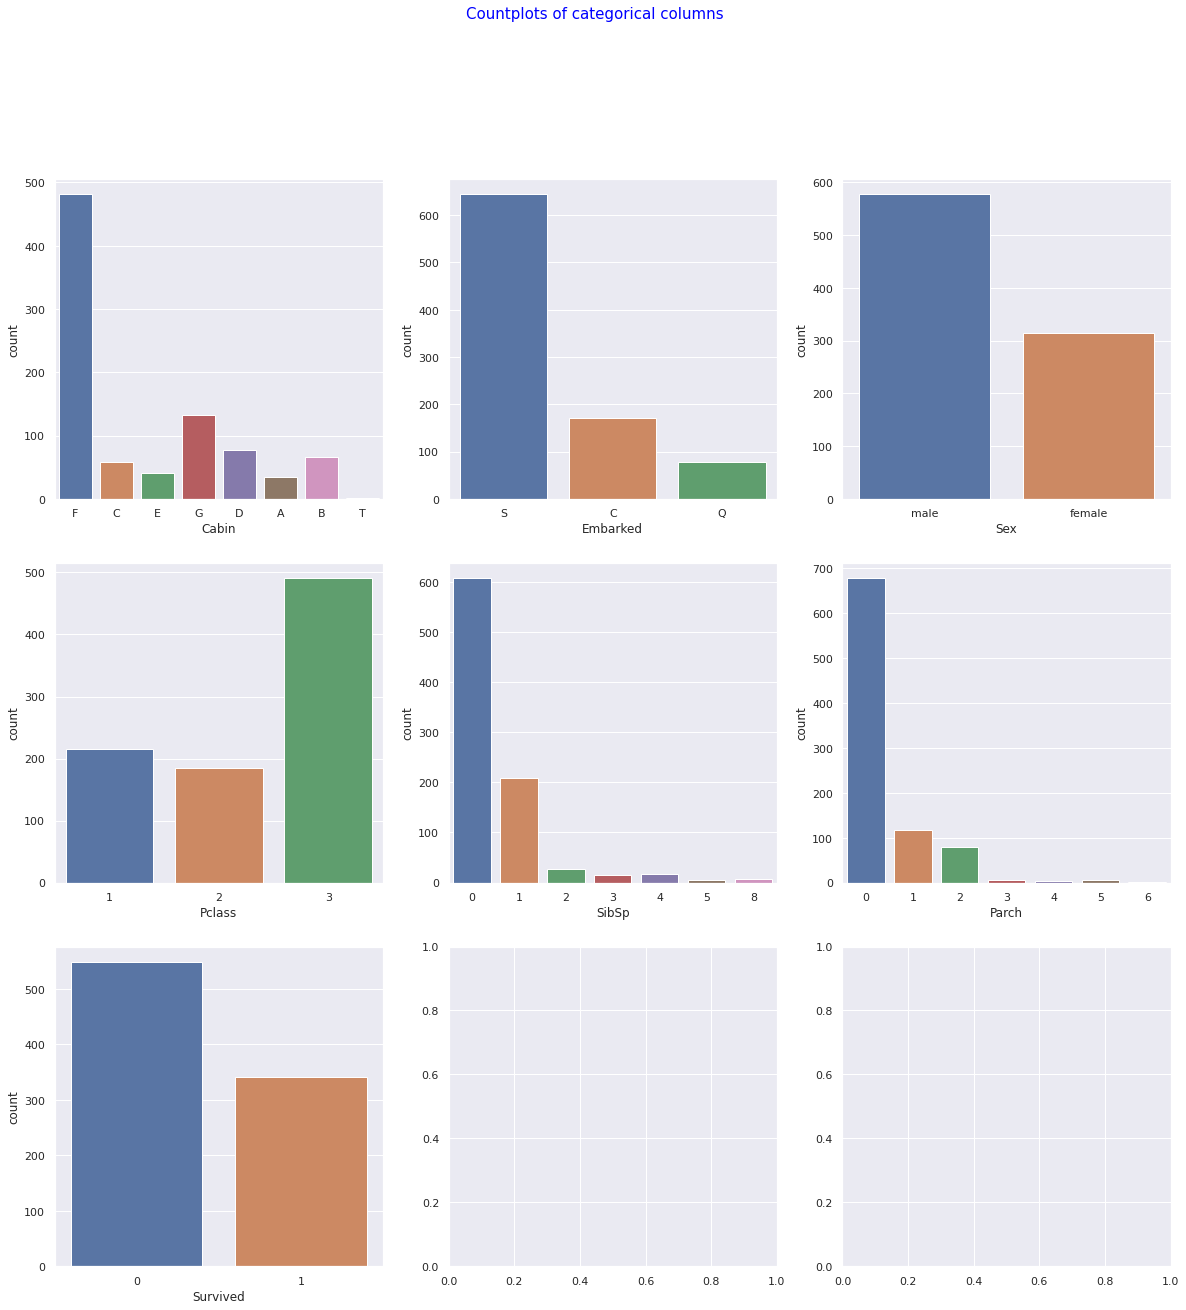

In [ ]:
# Countplot of categorical columns in the dataset
# creating a list of the categorical columns in the dataset

categorical_columns_1 =['Cabin', 'Embarked','Sex', 'Pclass','SibSp','Parch','Survived' ]


sb.set(style = 'darkgrid', context = 'notebook')

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,20))
plt.suptitle('Countplots of categorical columns', fontsize = 15, y = 1, color = 'blue')
for ax, data, column in zip(axes.flatten(), df_train, categorical_columns_1):
   sb.countplot(df_train[column], ax=ax)

There were more males on the ship than females
Persons who died in the tragedy were more than those who survived
Most people on the ship did not have family members onboard
The third class had most people on the ship
Cabin Z had the most occupants

### Bi-variate Analysis

#### Gender vs Survived

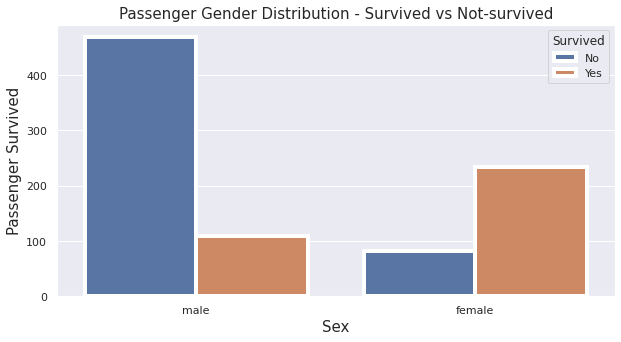

In [ ]:

pal = {1:"green", 0:"red"}
sns.set(style="darkgrid")
plt.subplots(figsize = (10,5))
ax = sns.countplot(x = "Sex", 
                   hue="Survived",
                   data = df_train, 
                   linewidth=4, 
                  
)

## Fixing title, xlabel and ylabel
plt.title("Passenger Gender Distribution - Survived vs Not-survived", fontsize = 15)
plt.xlabel("Sex", fontsize = 15);
plt.ylabel("Passenger Survived", fontsize = 15)



## Fixing legends
leg = ax.get_legend()
leg.set_title("Survived")
legs = leg.texts
legs[0].set_text("No")
legs[1].set_text("Yes")
plt.show()

More men died in the tragedy as compared to women.This is because a disproportionate number of men
were left aboard because of a "women and children first" protocol for loading lifeboats.

#### Correlation

In [ ]:
# Let's display the correlations between the variables
corr = df_train.corr()
corr

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


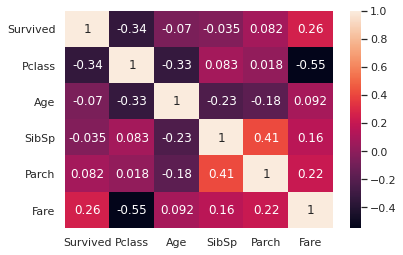

In [ ]:
#visualizing the correlation on a heatmap
plt.figure()
sb.heatmap(corr, annot = True)
plt.show()

The correlations are low which means most of the features are independent.
There is low multi-collinearity

## Feature Engineering

In [ ]:
train = pd.get_dummies(df_train, columns=["Pclass", 'Sex','Cabin','Embarked'], drop_first=False)
train.drop(['Name', 'Fare'], axis=1, inplace=True)

In [ ]:
#Finding the best principal Components
from sklearn.decomposition import PCA

np.random.seed(0)

X = train.drop('Survived', axis=1)
y = train['Survived']

train_features = X

model = PCA(n_components=5).fit(train_features)

# number of components
n_pcs= model.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = [ 'Age', 'SibSp', 'Parch', 'calculated_fare', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male', 'Cabin_A', 'Cabin_B',
       'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_N',
       'Cabin_T', 'Embarked_C', 'Embarked_Q', 'Embarked_S'
        ]
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}
# build the dataframe
df = pd.DataFrame(dic.items())
df

,0,1
0,PC0,Age
1,PC1,SibSp
2,PC2,Pclass_3
3,PC3,Parch
4,PC4,Sex_female


In [ ]:
model.explained_variance_ratio_

array([0.97761687, 0.00814963, 0.00342994, 0.00259031, 0.0021263 ])

##  Modelling

### Baseline Model: Logistic Regression


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
# import LogisticRegression model in python. 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, accuracy_score

## call on the model object
logreg = LogisticRegression(solver='liblinear')

## fit the model with "train_x" and "train_y"
logreg.fit(X_train,y_train)

## Once the model is trained we want to find out how well the model is performing, so we test the model. 
## we use "test_x" portion of the data(this data was not used to fit the model) to predict model outcome. 
y_pred = logreg.predict(X_test)

## Once predicted we save that outcome in "y_pred" variable.
## Then we compare the predicted value( "y_pred") and actual value("test_y") to see how well our model is performing. 

print ("The accuracy Score is: {}".format((accuracy_score(y_pred, y_test)*100)))

The accuracy Score is: 82.12290502793296


In [ ]:
print(confusion_matrix(y_test, y_pred))

[[88 15]
 [17 59]]


### KNN: K-Nearest Neighbor

#### Approach 1: 80 - 20 split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# The final step is to make predictions on our test data
# ---
# 
y_pred = classifier.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.7653631284916201

#### Approach 2: 70 - 30 split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# The final step is to make predictions on our test data
# ---
# 
y_pred = classifier.predict(X_test)

In [ ]:
# Evaluating the Algorithm

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       156
           1       0.84      0.63      0.72       112

    accuracy                           0.79       268
   macro avg       0.81      0.77      0.78       268
weighted avg       0.80      0.79      0.79       268



In [ ]:
accuracy_score(y_test, y_pred)

0.7947761194029851

#### Approach 3: 60 - 40 split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# The final step is to make predictions on our test data

y_pred = classifier.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.8123249299719888

### Naive Bayes

In [ ]:
 # Splitting our data into a training set and a test set
# 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
# Training our model
# 
clf = GaussianNB()  
model = clf.fit(X_train, y_train)

In [ ]:
# Predicting our test predictors
predicted = model.predict(X_test)
print(np.mean(predicted == y_test))

0.6343283582089553


## Challenging the solution: Dimensionality Reduction

### Approach 1:5 Principal Components

KNN and Naive Bayes Models using 5 Principal Components.

In [ ]:
# Reviewing the Solution 
#Modelling using the first 10 principal components
X1 = X[['Age', 'SibSp', 'Parch','Pclass_3']]
X1.head(5)

,Age,SibSp,Parch,Pclass_3
0,22.0,1,0,1
1,38.0,1,0,0
2,26.0,0,0,1
3,35.0,1,0,0
4,35.0,0,0,1


#### KNN

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.20)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# The final step is to make predictions on our test data

y_pred = classifier.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.6815642458100558

#### Naive Bayes

In [ ]:
 # Splitting our data into a training set and a test set
# 
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=6)

In [ ]:
# Training our model

clf = GaussianNB()  
model = clf.fit(X_train, y_train)

In [ ]:
# Predicting our test predictors
predicted = model.predict(X_test)
print(np.mean(predicted == y_test))

0.6828358208955224


### Approach 2: LDA

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

A_train, A_test, b_train, b_test = train_test_split(X, y, test_size=0.2, random_state=0)
A_train, A_test, b_train, b_test

(           Age  SibSp  Parch  ...  Embarked_C  Embarked_Q  Embarked_S
 140  29.699118      0      2  ...           1           0           0
 439  31.000000      0      0  ...           0           0           1
 817  31.000000      1      1  ...           1           0           0
 378  20.000000      0      0  ...           1           0           0
 491  21.000000      0      0  ...           0           0           1
 ..         ...    ...    ...  ...         ...         ...         ...
 835  39.000000      1      1  ...           1           0           0
 192  19.000000      1      0  ...           0           0           1
 629  29.699118      0      0  ...           0           1           0
 559  36.000000      1      0  ...           0           0           1
 684  60.000000      1      1  ...           0           0           1
 
 [712 rows x 19 columns],
            Age  SibSp  Parch  ...  Embarked_C  Embarked_Q  Embarked_S
 495  29.699118      0      0  ...           1   

In [ ]:
#Normalization
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
A_train = sc.fit_transform(A_train)
A_test = sc.transform(A_test)

In [ ]:
#performing LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
A_train = lda.fit_transform(A_train, b_train)
A_test = lda.transform(A_test)

In [ ]:
#Training and Making Predictions
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(A_train, b_train)
b_pred = classifier.predict(A_test)

In [ ]:
#Evaluating the Performance


print('Accuracy ' + str (accuracy_score(b_test, b_pred)*100))

Accuracy 79.88826815642457


The best predictor is the Logistric Regressor followed by The LDA model.

## Follow up questions

### a). Did we have the right data?

Yes! the data was sufficient and the features were useful in modelling.
The models above achieved almost the same accuracy levels which means that the data is good for training.

### b). Do we need other data to answer our question?

More Feature Engineering may be done to uncover more patterns in the data 
that may improve the model accuracy.

### c). Did we have the right question?

yes! Predicting survival based on past disasters helps us understand panic psychology and what to 
anticipate incase disaster strikes in future.